# Code
Import libraries, load dataset,data pre-processing, make data compatible

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
import itertools
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,Activation,GlobalMaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
 !wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7880/862031/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1610181297&Signature=p0zAvDLq8TOzzlt8IbXGsVqY7PbTzyWcn6CgRU571bqMeuYIn3OYkVrj0udTXuetlfCJPkkmwom%2B%2FMyO0hi3rUSEQzVaeQ537DULzChhPScD5PoEhtPC0fK40DkGmIxc9D8N8FFpXVtCd5uNYxgHg35y2cwbZId%2FSdbj0rHpaBbKCDy5o%2BBNkIAXZsUsvERLUPv8xg2tXbqfozp%2FjCoa4hszkNTVSRA6%2FlVSbBHOhIGGtBdTvZUAqZwdCY5m86NZOElQOwCNFJy3XJXZKhfXHx3oN1loI8JBhXEMMc6BhKhJymCEEI%2BlkYPU5%2F%2FLZ3DftPHyvtehkerOexzT6f6dhg%3D%3D&response-content-disposition=attachment%3B+filename%3Dplant-seedlings-classification.zip" -c -O 'plant-seedlings-classification.zip'

--2022-04-28 06:08:59--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7880/862031/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1610181297&Signature=p0zAvDLq8TOzzlt8IbXGsVqY7PbTzyWcn6CgRU571bqMeuYIn3OYkVrj0udTXuetlfCJPkkmwom%2B%2FMyO0hi3rUSEQzVaeQ537DULzChhPScD5PoEhtPC0fK40DkGmIxc9D8N8FFpXVtCd5uNYxgHg35y2cwbZId%2FSdbj0rHpaBbKCDy5o%2BBNkIAXZsUsvERLUPv8xg2tXbqfozp%2FjCoa4hszkNTVSRA6%2FlVSbBHOhIGGtBdTvZUAqZwdCY5m86NZOElQOwCNFJy3XJXZKhfXHx3oN1loI8JBhXEMMc6BhKhJymCEEI%2BlkYPU5%2F%2FLZ3DftPHyvtehkerOexzT6f6dhg%3D%3D&response-content-disposition=attachment%3B+filename%3Dplant-seedlings-classification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 142.251.120.128, 74.125.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 400 Bad Request
2022-04-28 06:08:59 ERROR 400: Bad Request.



In [ ]:
train_path = "/content/drive/MyDrive/Colab Notebooks/AAT/plant-seedlings-classification.zip"
# Set the path to plant-seedlings-classification.zip after download it using wget
#train_path = "/content/plant-seedlings-classification.zip"

!mkdir temp_train

In [ ]:
from zipfile import ZipFile
with ZipFile(train_path, 'r') as zip:
  zip.extractall('./temp_train')

FileNotFoundError: ignored

# bold text# Data label encoding and preprocessing

In [ ]:
test_images_path = "./temp_train/test/*.png"
test_images = glob(test_images_path)
path = "./temp_train/train/*/*.png"
files = glob(path)
count=0
trainImg = [] # Initialize empty list to store the image data as numbers.
trainLabel = [] # Initialize empty list to store the labels of images
j = 1
num = len(files)

# Obtain images and resizing, obtain labels
for img in files:
    count+=1
    '''
    Append the image data to trainImg list.
    Append the labels to trainLabel list.
    '''
    print(str(j) + "/" + str(num), end="\r")
    trainImg.append(cv2.resize(cv2.imread(img), (128 , 128)))  # Get image (with resizing to 128x128)
    trainLabel.append(img.split('/')[-2])  # Get image label (folder name contains the class to which the image belong)
    j += 1
print(count)
trainImg = np.asarray(trainImg)  # Train images set
trainLabel = pd.DataFrame(trainLabel)  # Train labels set

4750


In [ ]:
print(trainImg.shape)
print(trainLabel.shape)

(4750, 128, 128, 3)
(4750, 1)


In [ ]:
trainLabel[0].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: 0, dtype: int64

Text(0.5, 1.0, 'Small-flowered Cranesbill')

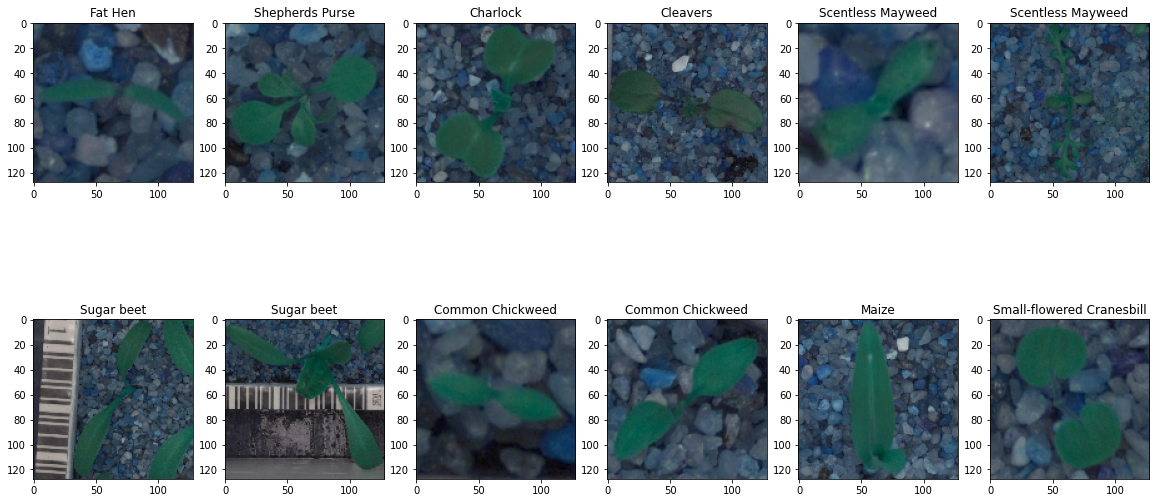

In [ ]:
f = plt.figure(figsize=(20, 20))

f.add_subplot(2, 6, 1)
plt.imshow(trainImg[0])
plt.title(trainLabel[0][0])

f.add_subplot(2, 6, 2)
plt.imshow(trainImg[496])
plt.title(trainLabel[0][496])

f.add_subplot(2, 6, 3)
plt.imshow(trainImg[759])
plt.title(trainLabel[0][759])

f.add_subplot(2, 6, 4)
plt.imshow(trainImg[1370])
plt.title(trainLabel[0][1370])

f.add_subplot(2, 6, 5)
plt.imshow(trainImg[1755])
plt.title(trainLabel[0][1755])

f.add_subplot(2, 6, 6)
plt.imshow(trainImg[1685])
plt.title(trainLabel[0][1685])

f.add_subplot(1, 6, 1)
plt.imshow(trainImg[2409])
plt.title(trainLabel[0][2409])

f.add_subplot(1, 6, 2)
plt.imshow(trainImg[2630])
plt.title(trainLabel[0][2630])

f.add_subplot(1, 6, 3)
plt.imshow(trainImg[3020])
plt.title(trainLabel[0][3020])

f.add_subplot(1, 6, 4)
plt.imshow(trainImg[3251])
plt.title(trainLabel[0][3251])

f.add_subplot(1, 6, 5)
plt.imshow(trainImg[3538])
plt.title(trainLabel[0][3538])

f.add_subplot(1, 6, 6)
plt.imshow(trainImg[4749])
plt.title(trainLabel[0][4749])

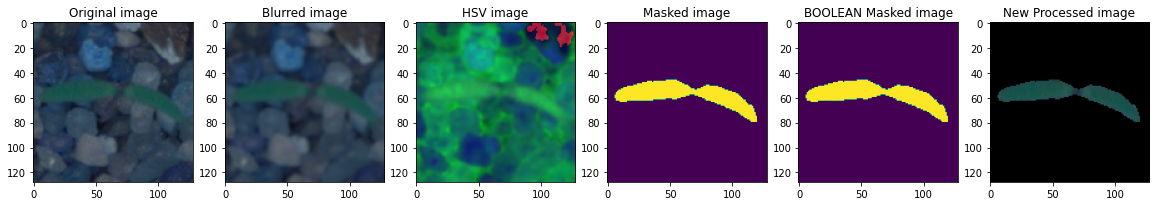

In [ ]:
trainImg_new = []
sets = []; getEx = True

for i in trainImg:
    # Blurred image
    blurr = cv2.GaussianBlur(i,(5,5),0)
    # HSV image
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)

    #Green Parameters
    sensitivity = 35
    lower  = np.array([60 - sensitivity, 100, 50])
    upper = np.array([60 + sensitivity, 255, 255])

    #Masked image
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)

    #Boolean image
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    trainImg_new.append(new)

    if getEx:
        f = plt.figure(figsize=(20, 20))
        f.add_subplot(1,6,1);plt.imshow(i);plt.title('Original image') # Original image
        f.add_subplot(1,6,2);plt.imshow(blurr);plt.title('Blurred image') # Blurred image
        f.add_subplot(1,6,3);plt.imshow(hsv);plt.title('HSV image') # HSV image
        f.add_subplot(1,6,4);plt.imshow(mask);plt.title('Masked image') # Masked image
        f.add_subplot(1,6,5);plt.imshow(boolean);plt.title('BOOLEAN Masked image') # BOOLEAN Masked image
        f.add_subplot(1,6,6);plt.imshow(new);plt.title('New Processed image') # New Processed image
        getEx = False

trainImg_new = np.asarray(trainImg_new)


In [ ]:
trainImg_new.shape

(4750, 128, 128, 3)

In [ ]:
labels = preprocessing.LabelEncoder()
labels.fit(trainLabel[0])
print('Classes'+str(labels.classes_))

Classes['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


In [ ]:
labels = preprocessing.LabelEncoder()
labels.fit(trainLabel[0])
print('Classes'+str(labels.classes_))
encodedlabel = labels.transform(trainLabel[0])
convertedlabels = np_utils.to_categorical(encodedlabel)
classes = convertedlabels.shape[1]
print(str(classes))

Classes['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
12


In [ ]:
trainImg_new = trainImg_new.astype('float32') / 255.0

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(trainImg_new,convertedlabels,test_size=0.3,random_state=38,stratify=convertedlabels)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


In [ ]:
print(X_train.shape)

(3325, 128, 128, 3)


In [ ]:
X_val,X_test_new,y_val,y_test_new = train_test_split(X_test,y_test,test_size=0.5,random_state=38,stratify=y_test)

In [ ]:
print(X_val.shape)
print(y_val.shape)
print(X_test_new.shape)
print(y_test_new.shape)

(712, 128, 128, 3)
(712, 12)
(713, 128, 128, 3)
(713, 12)


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
labels.classes_[10]

'Small-flowered Cranesbill'

# K-Means Clustering Preprocessing Technique

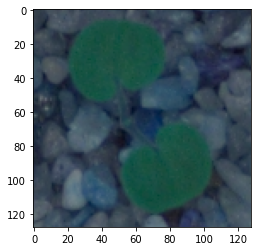

In [ ]:
trainImgkmeans_new = []
count=0;  #4750

for original_image in trainImg:
  if count==4751:
    break
  img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
  vectorized = img.reshape((-1,3))
  vectorized = np.float32(vectorized)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 10
  attempts=10
  ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result_image = result.reshape((img.shape))
  trainImgkmeans_new.append(img)
  count+=1
plt.imshow(trainImg[4749])
plt.show()
plt.imshow(result_image)
plt.show()
print(count)
plt.bar(range(256), cv2.calcHist([result_image],[0],None,[256],[0,256]).ravel())






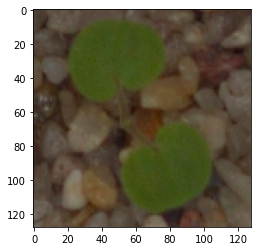

In [ ]:
#trainImgkmeans_new = np.asarray( trainImgkmeans_new)
#trainImgkmeans_new = trainImgkmeans_new.astype('float32') / 255.0
plt.imshow(trainImgkmeans_new[4749])
plt.show()

4750


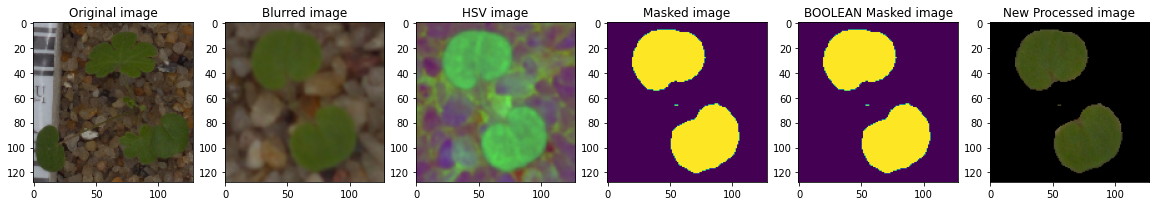

In [ ]:
trainedmaskmeansimg=[]
sets = []; getEx = True
count=0
for i in trainImgkmeans_new:

  if count==4751:
    break


  blurr = cv2.GaussianBlur(i,(5,5),0)
  hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)



    #Green Parameters
  sensitivity = 35
  lower  = np.array([60 - sensitivity, 100, 50])
  upper = np.array([60 + sensitivity, 255, 255])
  ##upper = (70,255,255)
    #Masked image
  mask = cv2.inRange(hsv,lower,upper)
  struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
  mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    #Boolean image
  boolean = mask>0
  new = np.zeros_like(i,np.uint8)
  new[boolean] = i[boolean]
  trainedmaskmeansimg.append(new)
  count+=1
if getEx:
  f = plt.figure(figsize=(20, 20))
  f.add_subplot(1,6,1);plt.imshow(trainImgkmeans_new[4748]);plt.title('Original image') # Original image
  f.add_subplot(1,6,2);plt.imshow(blurr);plt.title('Blurred image') # Blurred image
  f.add_subplot(1,6,3);plt.imshow(hsv);plt.title('HSV image') # HSV image
  f.add_subplot(1,6,4);plt.imshow(mask);plt.title('Masked image') # Masked image
  f.add_subplot(1,6,5);plt.imshow(boolean);plt.title('BOOLEAN Masked image') # BOOLEAN Masked image
  f.add_subplot(1,6,6);plt.imshow(new);plt.title('New Processed image') # New Processed image
  getEx = False

print(count)
trainedmaskmeansimg= np.asarray(trainedmaskmeansimg)




Text(0.5, 1.0, 'New Processed image')

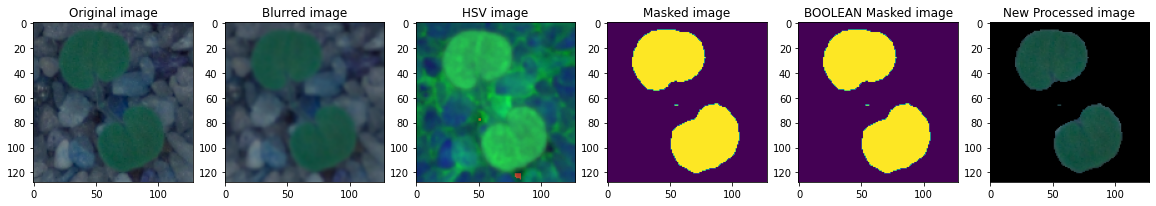

In [ ]:
# Blurred image
i =trainImg[4749]


blurr = cv2.GaussianBlur(i,(5,5),0)
    # HSV image
hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)

    #Green Parameters
sensitivity = 35
lower  = np.array([60 - sensitivity, 100, 50])
upper = np.array([60 + sensitivity, 255, 255])

    #Masked image
mask = cv2.inRange(hsv,lower,upper)
struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)

    #Boolean image
boolean = mask>0
new = np.zeros_like(i,np.uint8)
new[boolean] = i[boolean]

f = plt.figure(figsize=(20, 20))
f.add_subplot(1,6,1);plt.imshow(i);plt.title('Original image') # Original image
f.add_subplot(1,6,2);plt.imshow(blurr);plt.title('Blurred image') # Blurred image
f.add_subplot(1,6,3);plt.imshow(hsv);plt.title('HSV image') # HSV image
f.add_subplot(1,6,4);plt.imshow(mask);plt.title('Masked image') # Masked image
f.add_subplot(1,6,5);plt.imshow(boolean);plt.title('BOOLEAN Masked image') # BOOLEAN Masked image
f.add_subplot(1,6,6);plt.imshow(new);plt.title('New Processed image') # New Processed image




In [ ]:
trainedmaskmeansimg.shape

(4749, 128, 128, 3)

In [ ]:
labels = preprocessing.LabelEncoder()
labels.fit(trainLabel[0])
print('Classes'+str(labels.classes_))
encodedlabel = labels.transform(trainLabel[0])
convertedlabels = np_utils.to_categorical(encodedlabel)
classes = convertedlabels.shape[1]
print(str(classes))

Classes['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
12


# k means masked image technique









In [ ]:
trainedmaskmeansimg = trainedmaskmeansimg.astype('float32') / 255.0

In [ ]:
X_kmtrain,X_kmtest,y_kmtrain,y_kmtest = train_test_split(trainedmaskmeansimg ,convertedlabels,test_size=0.3,random_state=38,stratify=convertedlabels)

In [ ]:
print(X_kmtrain.shape)
print(y_kmtrain.shape)
print(X_kmtest.shape)
print(y_kmtest.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


In [ ]:
X_kmval,X_kmtest_new,y_kmval,y_kmtest_new = train_test_split(X_kmtest,y_kmtest,test_size=0.5,random_state=38,stratify=y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

 Evaluation Model

*   6 convolution layers (filters=64/64/128/128/**256**/256, kernel_size=(3, 3) activation='relu')
*   MaxPool2D((2, 2)
*   Dropout(0.25)
*   GlobalMaxPool2D
*   Flatten
*   2 dense layers (256 / 256, activation='relu')
*   Dropout(0.25)
*   loss='categorical_crossentropy', optimizer='adam'
*   model compile with ImageDataGenerator to minimize overfitting.
*   shuffle = True
*callback option and lrr

In [ ]:
X_kmtrain,X_kmtest,y_kmtrain,y_kmtest = train_test_split(trainedmaskmeansimg ,convertedlabels,test_size=0.3,random_state=38,stratify=convertedlabels)

In [ ]:
generator = ImageDataGenerator(rotation_range = 180,zoom_range = 0.1,width_shift_range = 0.1,height_shift_range = 0.1,horizontal_flip = True,vertical_flip = True)
generator.fit(X_kmtrain)

In [ ]:

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(128, 128, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      4864      
                                                                 
 batch_normalization (BatchN  (None, 124, 124, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 64)      102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 64)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 64)       256       
 hNormalization)                                                 
                                                        

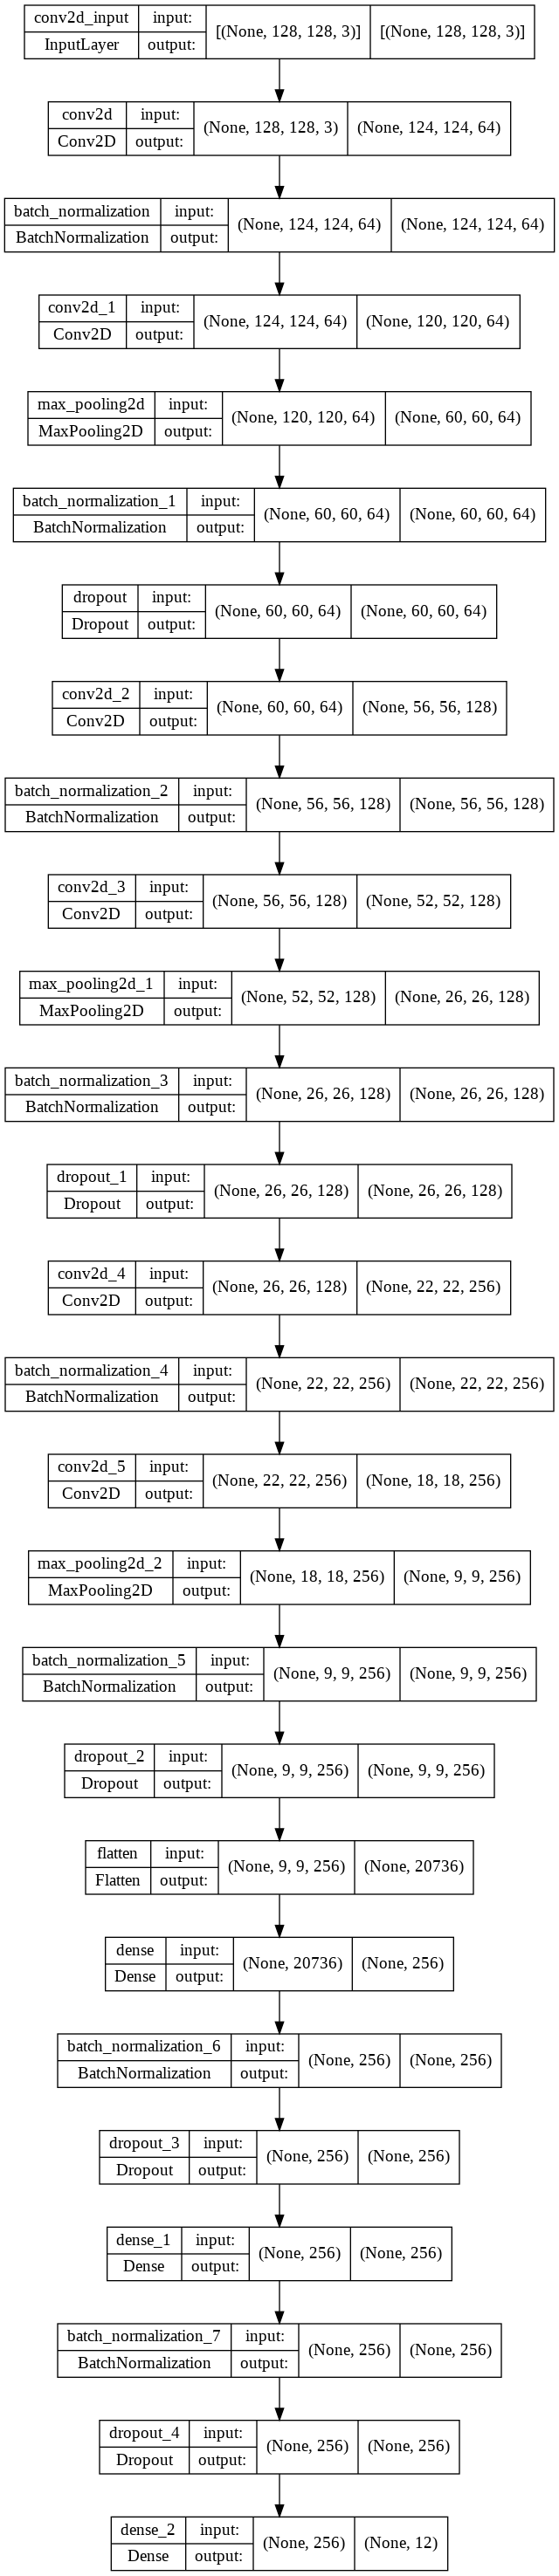

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
lrr = ReduceLROnPlateau(monitor='val_accuracy',  patience=3,   verbose=1,  factor=0.3,  min_lr=0.00001)

filepath="/content/drive/MyDrive/Colab Notebooks/AAT/kmeansmaskmodel1_weights.hdf5"
checkpoints = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoints,lrr]

history = model.fit(X_kmtrain,y_kmtrain,batch_size=64,epochs=50, verbose=3,shuffle=True,validation_data=(X_kmval,y_kmval),callbacks=callbacks_list)
pd.DataFrame(history.history)

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.12781, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/kmeansmaskmodel1_weights.hdf5
Epoch 2/50

Epoch 2: val_accuracy improved from 0.12781 to 0.13202, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/kmeansmaskmodel1_weights.hdf5
Epoch 3/50

Epoch 3: val_accuracy improved from 0.13202 to 0.15590, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/kmeansmaskmodel1_weights.hdf5
Epoch 4/50

Epoch 4: val_accuracy improved from 0.15590 to 0.38062, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/kmeansmaskmodel1_weights.hdf5
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.38062
Epoch 6/50

Epoch 6: val_accuracy improved from 0.38062 to 0.61798, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/kmeansmaskmodel1_weights.hdf5
Epoch 7/50

Epoch 7: val_accuracy improved from 0.61798 to 0.72753, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/kmeansmaskmodel1_weights.hdf

,loss,accuracy,val_loss,val_accuracy,lr
0,2.264887,0.339850,258.756073,0.127809,0.001000
1,1.472705,0.518196,27.499226,0.132022,0.001000
2,1.250395,0.575338,19.701256,0.155899,0.001000
3,1.041489,0.653835,7.622838,0.380618,0.001000
4,0.924412,0.692932,3.556008,0.367978,0.001000
5,0.840998,0.707669,1.751120,0.617977,0.001000
6,0.748153,0.742556,0.884381,0.727528,0.001000
7,0.721652,0.750376,3.611261,0.376404,0.001000
8,0.626126,0.785865,1.326643,0.691011,0.001000
9,0.570939,0.800601,2.097044,0.580056,0.001000


In [ ]:
lrr = ReduceLROnPlateau(monitor='val_accuracy',  patience=3,   verbose=1,  factor=0.3,  min_lr=0.00001)

filepath="/content/drive/MyDrive/Colab Notebooks/AAT/kmeansmaskmodel2_weights.hdf5"
checkpoints = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoints,lrr]

history = model.fit(X_kmtrain,y_kmtrain,batch_size=64,epochs=50, verbose=3,shuffle=True,validation_data=(X_kmval,y_kmval),callbacks=callbacks_list)
pd.DataFrame(history.history)

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.13764, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/kmeansmaskmodel2_weights.hdf5
Epoch 2/50

Epoch 2: val_accuracy did not improve from 0.13764
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.13764
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.13764
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.13764
Epoch 6/50

Epoch 6: val_accuracy improved from 0.13764 to 0.14607, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/kmeansmaskmodel2_weights.hdf5
Epoch 7/50

Epoch 7: val_accuracy improved from 0.14607 to 0.14888, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/kmeansmaskmodel2_weights.hdf5
Epoch 8/50

Epoch 8: val_accuracy did not improve from 0.14888
Epoch 9/50

Epoch 9: val_accuracy did not improve from 0.14888
Epoch 10/50

Epoch 10: val_accuracy did not improve from 0.14888
Epoch 11/50

Epoch 11: val_accuracy did not improve from 0.14888
Epoch 12/50

Epoch 12: v

,loss,accuracy,val_loss,val_accuracy,lr
0,0.200886,0.931128,14.237806,0.137640,0.00001
1,0.158375,0.945263,10.664198,0.137640,0.00001
2,0.146484,0.950677,9.070633,0.137640,0.00001
3,0.140430,0.952180,8.152240,0.137640,0.00001
4,0.134088,0.955188,7.746303,0.137640,0.00001
5,0.134303,0.956993,7.040086,0.146067,0.00001
6,0.131492,0.958797,6.786507,0.148876,0.00001
7,0.131419,0.961504,6.493226,0.085674,0.00001
8,0.126768,0.959399,6.062877,0.092697,0.00001
9,0.120562,0.964511,5.850371,0.099719,0.00001


In [ ]:
model.load_weights("/content/drive/MyDrive/Colab Notebooks/AAT/kmeansmaskmodel1_weights.hdf5")

print(model.evaluate(X_kmtrain, y_kmtrain))  # Evaluate on train set
print(model.evaluate(X_kmtest, y_kmtest))  # Evaluate on test set

104/104 [==============================] - 4s 34ms/step - loss: 6.3187 - accuracy: 0.0466
[6.318694114685059, 0.04661654308438301]
45/45 [==============================] - 2s 33ms/step - loss: 6.3216 - accuracy: 0.0463
[6.3216071128845215, 0.046315789222717285]


In [ ]:
model.load_weights("/content/drive/MyDrive/Colab Notebooks/AAT/kmeansmaskmodel2_weights.hdf5")

print(model.evaluate(X_kmtrain, y_kmtrain))  # Evaluate on train set
print(model.evaluate(X_kmtest, y_kmtest))  # Evaluate on test set

104/104 [==============================] - 4s 34ms/step - loss: 0.0420 - accuracy: 0.9901
[0.04203151911497116, 0.9900751709938049]
45/45 [==============================] - 1s 33ms/step - loss: 0.4655 - accuracy: 0.8568
[0.4655205309391022, 0.8568421006202698]


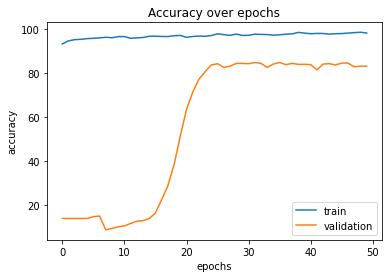

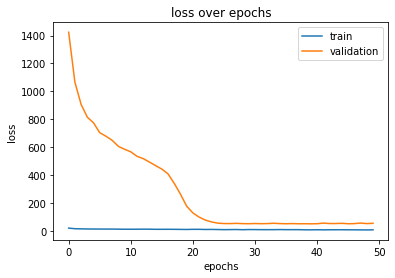

In [ ]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()


plt.plot(np.array(history.history['loss']) * 100)
plt.plot(np.array(history.history['val_loss']) * 100)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('loss over epochs')
plt.show()

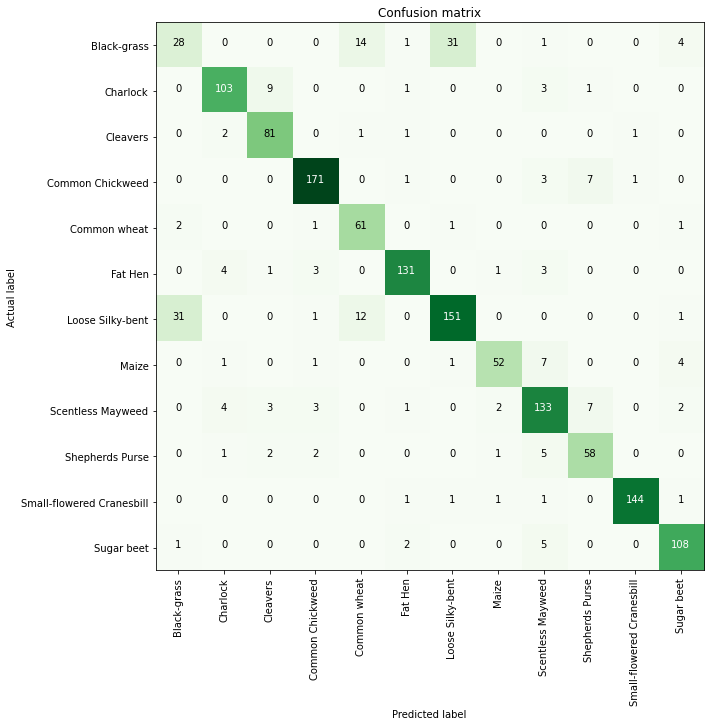

In [ ]:
# Predict the values from the test data
y_pred = model.predict(X_kmtest)
y_pred_Classes = np.argmax(y_pred, axis = 1)
trueY = np.argmax(y_kmtest, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = labels.classes_)

In [ ]:
score, acc = model.evaluate(X_kmtest_new,y_kmtest_new)
score1, acc1 = model.evaluate(X_kmtrain,y_kmtrain)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)


104/104 [==============================] - 4s 37ms/step - loss: 0.0420 - accuracy: 0.9901
Test score: 0.41435590386390686    Test accuracy: 0.8667601943016052
Train score: 0.04203151911497116    Train accuracy: 0.9900751709938049


kmean models train accuracy of  94 and test accuracy of 93%

# training dataset with the kmeans





In [ ]:
trainImgkmeans_new = trainImgkmeans_new.astype('float32') / 255.0

AttributeError: ignored

In [ ]:
X_ktrain,X_ktest,y_ktrain,y_ktest = train_test_split(trainImgkmeans_new ,convertedlabels,test_size=0.3,random_state=38,stratify=convertedlabels)

In [ ]:
print(X_ktrain.shape)
print(y_ktrain.shape)
print(X_ktest.shape)
print(y_ktest.shape)

AttributeError: ignored

In [ ]:
X_val,X_test_new,y_val,y_test_new = train_test_split(X_ktest,y_ktest,test_size=0.5,random_state=38,stratify=y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

 Evaluation Model

*   6 convolution layers (filters=64/64/128/128/**256**/256, kernel_size=(3, 3) activation='relu')
*   MaxPool2D((2, 2)
*   Dropout(0.25)
*   GlobalMaxPool2D
*   Flatten
*   2 dense layers (256 / 256, activation='relu')
*   Dropout(0.25)
*   loss='categorical_crossentropy', optimizer='adam'
*   model compile with ImageDataGenerator to minimize overfitting.
*   shuffle = True
*callback option and lrr

In [ ]:
X_ktrain,X_ktest,y_ktrain,y_ktest = train_test_split(trainImgkmeans_new ,convertedlabels,test_size=0.1,random_state=7,stratify=convertedlabels)

In [ ]:
generator = ImageDataGenerator(rotation_range = 180,zoom_range = 0.1,width_shift_range = 0.1,height_shift_range = 0.1,horizontal_flip = True,vertical_flip = True)
generator.fit(X_ktrain)

In [ ]:

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(128, 128, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 124, 124, 64)      4864      
                                                                 
 batch_normalization_24 (Bat  (None, 124, 124, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 120, 120, 64)      102464    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 60, 60, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_25 (Bat  (None, 60, 60, 64)       256       
 chNormalization)                                                
                                                      

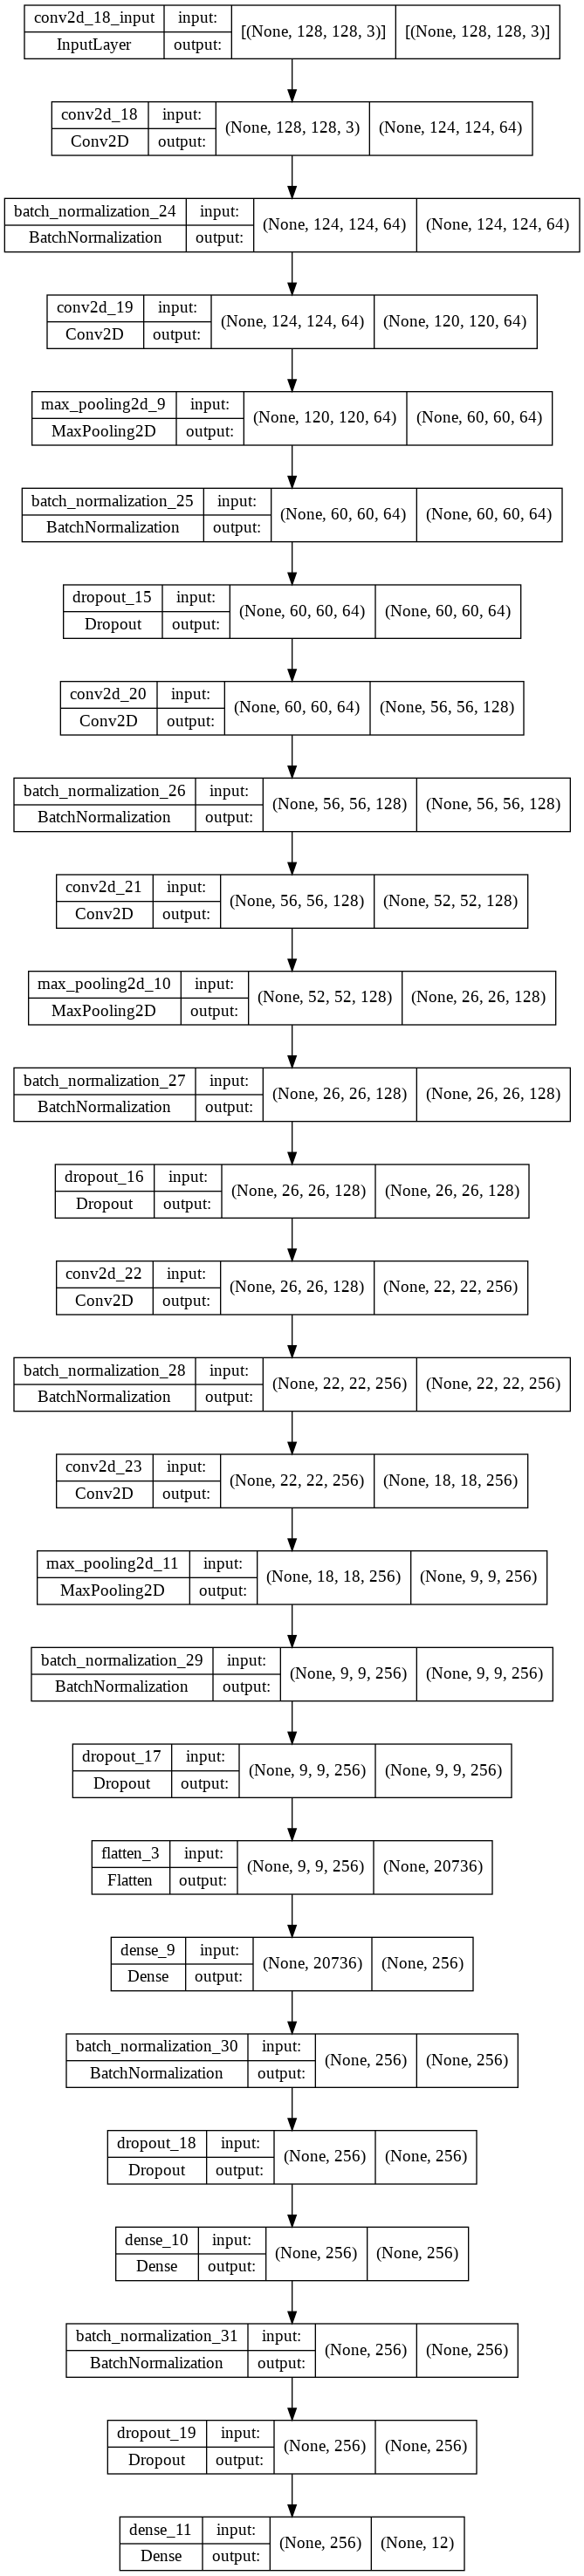

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
lrr = ReduceLROnPlateau(monitor='val_accuracy',  patience=3,   verbose=1,  factor=0.3,  min_lr=0.00001)

filepath="/content/drive/MyDrive/Colab Notebooks/AAT/kmeansmodel1_weights.hdf5"
checkpoints = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoints,lrr]

history = model.fit(X_ktrain,y_ktrain,batch_size=64,epochs=50, verbose=3,shuffle=True,validation_data=(X_val,y_val),callbacks=callbacks_list)
pd.DataFrame(history.history)

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.06039, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/kmeansmodel1_weights.hdf5
Epoch 2/50

Epoch 2: val_accuracy improved from 0.06039 to 0.08287, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/kmeansmodel1_weights.hdf5
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.08287
Epoch 4/50

Epoch 4: val_accuracy improved from 0.08287 to 0.13764, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/kmeansmodel1_weights.hdf5
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.13764
Epoch 6/50

Epoch 6: val_accuracy did not improve from 0.13764
Epoch 7/50

Epoch 7: val_accuracy did not improve from 0.13764

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 8/50

Epoch 8: val_accuracy did not improve from 0.13764
Epoch 9/50

Epoch 9: val_accuracy did not improve from 0.13764
Epoch 10/50

Epoch 10: val_accuracy did not improve from 0.13764

Epoch 10: ReduceLROnPla

,loss,accuracy,val_loss,val_accuracy,lr
0,1.554890,0.482807,6.065768,0.060393,0.001000
1,1.241621,0.580351,6.373726,0.082865,0.001000
2,1.035947,0.648421,9.807260,0.060393,0.001000
3,0.859964,0.706199,19.516008,0.137640,0.001000
4,0.762523,0.737544,28.962402,0.137640,0.001000
5,0.690844,0.757427,21.601292,0.137640,0.001000
6,0.644494,0.780351,452.613983,0.127809,0.001000
7,0.528574,0.814269,264.633698,0.127809,0.000300
8,0.462313,0.842807,167.320679,0.127809,0.000300
9,0.446470,0.842573,115.378227,0.127809,0.000300


In [ ]:
model.load_weights("/content/drive/MyDrive/Colab Notebooks/AAT/kmeansmodel1_weights.hdf5")

print(model.evaluate(X_ktrain, y_ktrain))  # Evaluate on train set
print(model.evaluate(X_ktest, y_ktest))  # Evaluate on test set

134/134 [==============================] - 9s 69ms/step - loss: 0.1618 - accuracy: 0.9411
[0.16177302598953247, 0.9410526156425476]
15/15 [==============================] - 1s 68ms/step - loss: 0.4047 - accuracy: 0.8526
[0.4047400951385498, 0.8526315689086914]


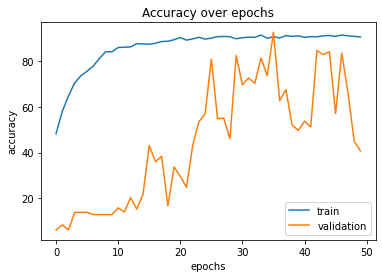

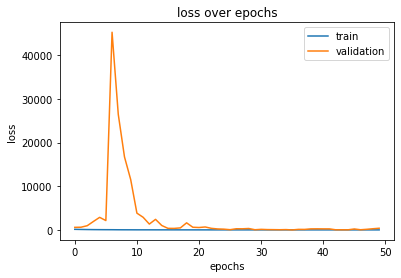

In [ ]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()


plt.plot(np.array(history.history['loss']) * 100)
plt.plot(np.array(history.history['val_loss']) * 100)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('loss over epochs')
plt.show()

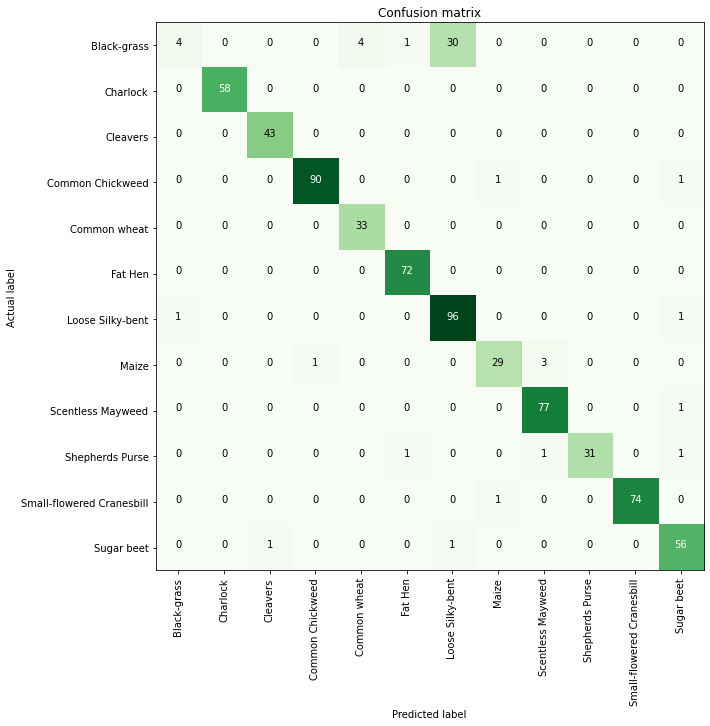

In [ ]:
# Predict the values from the test data
y_pred = model.predict(X_test_new)
y_pred_Classes = np.argmax(y_pred, axis = 1)
trueY = np.argmax(y_test_new, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = labels.classes_)

In [ ]:
score, acc = model.evaluate(X_test_new,y_test_new)
score1, acc1 = model.evaluate(X_ktrain,y_ktrain)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)


134/134 [==============================] - 9s 68ms/step - loss: 0.1618 - accuracy: 0.9411
Test score: 0.20787514746189117    Test accuracy: 0.9298737645149231
Train score: 0.16177302598953247    Train accuracy: 0.9410526156425476


kmean models train accuracy of  94 and test accuracy of 93%

# k means and has masked green images

In [ ]:

trainImg= trainImg.astype('float32') / 255.0

In [ ]:
X_itrain,X_itest,y_itrain,y_itest = train_test_split(trainImg ,convertedlabels,test_size=0.3,random_state=38,stratify=convertedlabels)

In [ ]:
X_val,X_test_new,y_val,y_test_new = train_test_split(X_test,y_test,test_size=0.5,random_state=38,stratify=y_test)

 Evaluation Model

*   6 convolution layers (filters=64/64/128/128/**256**/256, kernel_size=(3, 3) activation='relu')
*   MaxPool2D((2, 2)
*   Dropout(0.25)
*   GlobalMaxPool2D
*   Flatten
*   2 dense layers (256 / 256, activation='relu')
*   Dropout(0.25)
*   loss='categorical_crossentropy', optimizer='adam'
*   model compile with ImageDataGenerator to minimize overfitting.
*   shuffle = True
*callback option and lrr

In [ ]:
generator = ImageDataGenerator(rotation_range = 180,zoom_range = 0.1,width_shift_range = 0.1,height_shift_range = 0.1,horizontal_flip = True,vertical_flip = True)
generator.fit(X_itrain)

NameError: ignored

In [ ]:

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(70, 70, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

NameError: ignored

In [ ]:
lrr = ReduceLROnPlateau(monitor='val_accuracy',  patience=3,   verbose=1,  factor=0.3,  min_lr=0.00001)

filepath="/content/drive/MyDrive/Colab Notebooks/AAT/imodel1_weights.hdf5"
checkpoints = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoints,lrr]

history = model.fit(generator.flow(X_train,y_train,batch_size=64),epochs=50, verbose=3,shuffle=True,validation_data=(X_val,y_val),callbacks=callbacks_list)
pd.DataFrame(history.history)

Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.04775, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/Fmodel1_weights.hdf5
Epoch 2/50

Epoch 00002: val_accuracy improved from 0.04775 to 0.06039, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/Fmodel1_weights.hdf5
Epoch 3/50

Epoch 00003: val_accuracy did not improve from 0.06039
Epoch 4/50

Epoch 00004: val_accuracy did not improve from 0.06039
Epoch 5/50

Epoch 00005: val_accuracy improved from 0.06039 to 0.08006, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/Fmodel1_weights.hdf5
Epoch 6/50

Epoch 00006: val_accuracy improved from 0.08006 to 0.10815, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/Fmodel1_weights.hdf5
Epoch 7/50

Epoch 00007: val_accuracy did not improve from 0.10815
Epoch 8/50

Epoch 00008: val_accuracy improved from 0.10815 to 0.18539, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/Fmodel1_weights.hdf5
Epoch 9/50

Epoch 00009: val_accuracy impr

,loss,accuracy,val_loss,val_accuracy,lr
0,2.069816,0.362339,9.599217,0.047753,0.001000
1,1.752261,0.423158,13.866310,0.060393,0.001000
2,1.543570,0.483275,17.814545,0.060393,0.001000
3,1.391800,0.514386,15.908839,0.046348,0.001000
4,1.241323,0.574269,13.500821,0.080056,0.001000
5,1.142928,0.611228,7.629828,0.108146,0.001000
6,1.028494,0.654503,7.215950,0.103933,0.001000
7,0.940493,0.680936,3.781040,0.185393,0.001000
8,0.891804,0.701520,2.102118,0.467697,0.001000
9,0.817958,0.723509,1.005785,0.669944,0.001000


In [ ]:
model.load_weights("/content/drive/MyDrive/Colab Notebooks/AAT/Fmodel1_weights.hdf5")

print(model.evaluate(X_train, y_train))  # Evaluate on train set
print(model.evaluate(X_test, y_test))  # Evaluate on test set

134/134 [==============================] - 5s 38ms/step - loss: 0.1865 - accuracy: 0.9331
[0.1864813268184662, 0.9330993890762329]
15/15 [==============================] - 2s 108ms/step - loss: 0.2470 - accuracy: 0.9200
[0.24699147045612335, 0.9200000166893005]


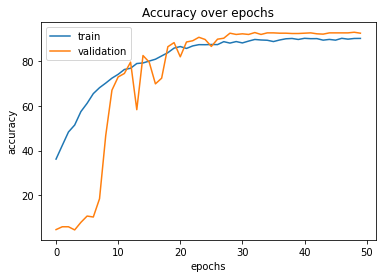

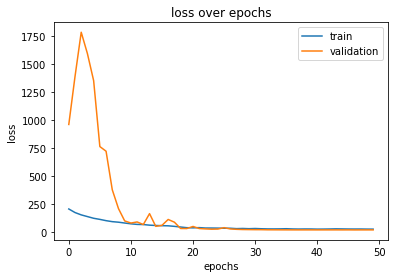

In [ ]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()


plt.plot(np.array(history.history['loss']) * 100)
plt.plot(np.array(history.history['val_loss']) * 100)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('loss over epochs')
plt.show()

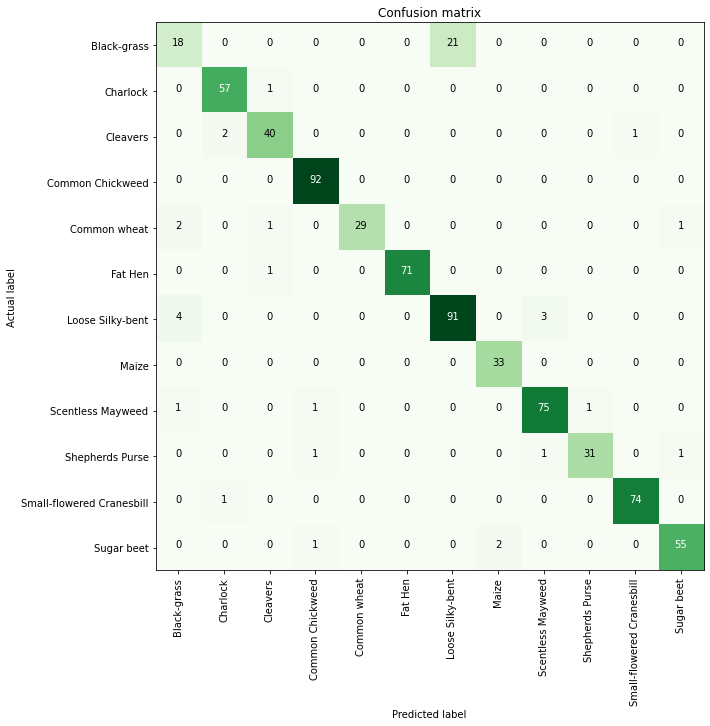

In [ ]:
# Predict the values from the test data
y_pred = model.predict(X_test_new)
y_pred_Classes = np.argmax(y_pred, axis = 1)
trueY = np.argmax(y_test_new, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = labels.classes_)

In [ ]:
score, acc = model.evaluate(X_test_new,y_test_new)
score1, acc1 = model.evaluate(X_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)


134/134 [==============================] - 4s 32ms/step - loss: 0.1865 - accuracy: 0.9331
Test score: 0.18329079449176788    Test accuracy: 0.9340813755989075
Train score: 0.1864813268184662    Train accuracy: 0.9330993890762329


Model 3 train accuracy of  93.3 and test accuracy of 93%

### Models

---

# New section

# edge detection and hystersis thresholding

In [ ]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

def segment(img):

  #image_mask = create_mask_for_plant(img)
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen

In [ ]:
image = images[classes == "Small-flowered Cranesbill"][40]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

In [ ]:
plt.imshow(trainedmaskmeansimg[739])
plt.show()

img_guassian = np.uint8(trainImg[739])
plt.bar(range(256),cv2.calcHist([img_guassian],[0],None,[256],[0,256]).ravel())
plt.show()

IndexError: ignored

In [ ]:
from scipy import ndimage

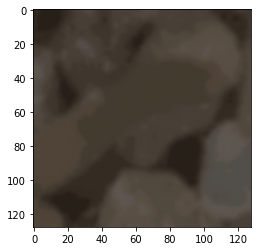

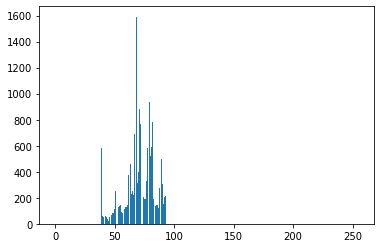

In [ ]:

img_guassian_filter = ndimage.gaussian_filter(  result_image , sigma=1.0)
plt.imshow(img_guassian_filter)
plt.show()

img_guassian = np.uint8(trainImg[1000])
plt.bar(range(256),cv2.calcHist([img_guassian],[0],None,[256],[0,256]).ravel())
plt.show()

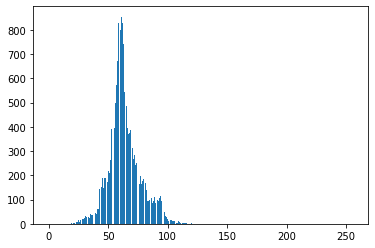

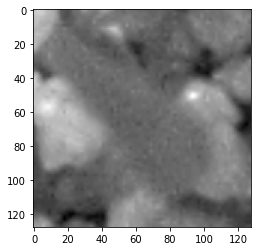

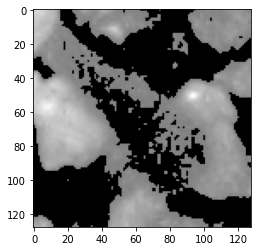

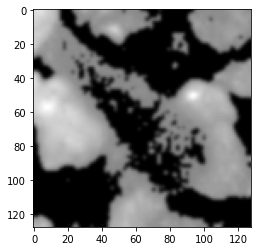

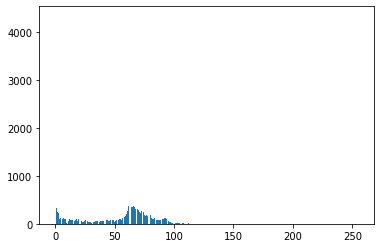

In [ ]:
from scipy import ndimage

trainImgkmeansgray_new = []
count=0;
for original_image in  trainImgkmeans_new:
  count+=1
  if count ==700:
    break
  clustered_img = cv2.imread('result_image')
  img1 = cv2.cvtColor(original_image , cv2.COLOR_BGR2RGB)
  img = cv2.cvtColor(original_image , cv2.COLOR_BGR2GRAY)
  trainImgkmeansgray_new.append(img)

plt.bar(range(256),cv2.calcHist([img],[0],None,[256],[0,256]).ravel())
plt.show()
img = img.astype('int32')
plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.show()
prop = img.shape
max = 60
img1 = [[0 if img[i][j]<=max else img[i][j] for j in range(prop[1])]for i in range(prop[0])]
plt.imshow(img1, cmap = plt.get_cmap('gray'))
plt.show()

img_guassian_filter = ndimage.gaussian_filter(img1, sigma=1.0)
plt.imshow(img_guassian_filter, cmap = plt.get_cmap('gray'))
plt.show()

img_guassian = np.uint8(img_guassian_filter)
plt.bar(range(256),cv2.calcHist([img_guassian],[0],None,[256],[0,256]).ravel())
plt.show()

In [ ]:
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread("plant_mango.png")
gray = rgb2gray(img)

plt.figure(figsize=(15, 15))

for i in range(10):
    binarized_gray = (gray > i*0.1)*1
    plt.subplot(5,2,i+1)

    plt.title("Threshold: >"+str(round(i*0.1,1)))

    plt.imshow(binarized_gray, cmap = 'gray')

plt.tight_layout()

In [ ]:
def SobelFilter(img, direction):
    if(direction == 'x'):
        Gx = np.array([[-1,0,+1], [-2,0,+2],  [-1,0,+1]])
        Res = ndimage.convolve(img, Gx)
    if(direction == 'y'):
        Gy = np.array([[-1,-2,-1], [0,0,0], [+1,+2,+1]])
        Res = ndimage.convolve(img, Gy)
    return Res
count=0
for img_guassian_filter in trainImg:
  gx = SobelFilter(img_guassian_filter, 'x')
  gx = Normalize(gx)
  gy = SobelFilter(img_guassian_filter, 'y')
  gy = Normalize(gy)
  Mag = np.hypot(gx,gy)
  plt.show()
  Gradient = np.degrees(np.arctan2(gy,gx))
  if count ==500:
    break
plt.imshow(gx, cmap = plt.get_cmap('gray'))
plt.title("derivative in x-direction")
plt.show()

plt.imshow(gy, cmap = plt.get_cmap('gray'))
plt.title("derivative in y-direction")
plt.show()

plt.imshow(Mag, cmap = plt.get_cmap('gray'))
plt.title("Final magnitude image with edge information")
plt.show()
Gradient = np.degrees(np.arctan2(gy,gx))



RuntimeError: ignored

In [ ]:
def NonMaxSup(Gmag, Grad):
    NMS = np.zeros(Gmag.shape)
    for i in range(1, int(Gmag.shape[0]) - 1):
        for j in range(1, int(Gmag.shape[1]) - 1):
            if((Grad[i,j] >= -22.5 and Grad[i,j] <= 22.5) or (Grad[i,j] <= -157.5 and Grad[i,j] >= 157.5)):
                if((Gmag[i,j] > Gmag[i,j+1]) and (Gmag[i,j] > Gmag[i,j-1])):
                    NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0
            if((Grad[i,j] >= 22.5 and Grad[i,j] <= 67.5) or (Grad[i,j] <= -112.5 and Grad[i,j] >= -157.5)):
                if((Gmag[i,j] > Gmag[i+1,j+1]) and (Gmag[i,j] > Gmag[i-1,j-1])):
                    NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0
            if((Grad[i,j] >= 67.5 and Grad[i,j] <= 112.5) or (Grad[i,j] <= -67.5 and Grad[i,j] >= -112.5)):
                if((Gmag[i,j] > Gmag[i+1,j]) and (Gmag[i,j] > Gmag[i-1,j])):
                    NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0
            if((Grad[i,j] >= 112.5 and Grad[i,j] <= 157.5) or (Grad[i,j] <= -22.5 and Grad[i,j] >= -67.5)):
                if((Gmag[i,j] > Gmag[i+1,j-1]) and (Gmag[i,j] > Gmag[i-1,j+1])):
                    NMS[i,j] = Gmag[i,j]
                else:
                    NMS[i,j] = 0

    return NMS

WINMS = NonMaxSup(Mag,Gradient)
WINMS = Normalize(WINMS)
# plt.imshow(WINMS, cmap = plt.get_cmap('gray'))
# plt.show()
imageio.imwrite('WINMS.jpg',WINMS)
kernel = np.ones((5,5), np.uint8)
imgd = cv2.dilate(WINMS, kernel, iterations=1)
plt.imshow(imgd, cmap = plt.get_cmap('gray'))
print("\nFinal output image to be used for disease detection:")
plt.show()

In [ ]:
def DoThreshHyst(img):
    highThresholdRatio =0.05  #0.32
    lowThresholdRatio = 0.01    #0.3
    GSup = np.copy(img)
    h = int(GSup.shape[0])
    w = int(GSup.shape[1])
    highThreshold = np.max(GSup) * highThresholdRatio
    lowThreshold = highThreshold * lowThresholdRatio

    for i in range(1,h-1):
        for j in range(1,w-1):
            if(GSup[i,j] > highThreshold):
                GSup[i,j] = 1
            elif(GSup[i,j] < lowThreshold):
                GSup[i,j] = 0
            else:
                if((GSup[i-1,j-1] > highThreshold) or
                    (GSup[i-1,j] > highThreshold) or
                    (GSup[i-1,j+1] > highThreshold) or
                    (GSup[i,j-1] > highThreshold) or
                    (GSup[i,j+1] > highThreshold) or
                    (GSup[i+1,j-1] > highThreshold) or
                    (GSup[i+1,j] > highThreshold) or
                    (GSup[i+1,j+1] > highThreshold)):
                    GSup[i,j] = 1

    GSup = (GSup == 1) * GSup #remove/clean all the weak edges which are not connected to strong edges
    return GSup

Final_Image = DoThreshHyst(WINMS)
plt.imshow(Final_Image, cmap = plt.get_cmap('gray'))
print("\nFinal output image to be used for plant classification:")
plt.show()
imageio.imwrite('Final_Image.jpg',Final_Image)

In [ ]:
trainImgkmeans_new = trainImg_new.astype('float32') / 255.0

In [ ]:
X_ktrain,X_kest,y_krain,y_ktest = train_test_split(trainImg_new,convertedlabels,test_size=0.3,random_state=38,stratify=convertedlabels)

In [ ]:
X_val,X_test_new,y_val,y_test_new = train_test_split(X_test,y_test,test_size=0.5,random_state=38,stratify=y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

# Confusion Matrix Code for showing the results


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Greens):

    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# CNN Model 1

*   3 convolution layers (filters=64/128/128 , kernel_size=(3, 3) activation='relu')
*   MaxPool2D((2, 2),
*   Dropout(0.25)
*   Flatten
*   1 dense layer (256, activation='relu')
*   Dropout(0.5)
*   loss='categorical_crossentropy', optimizer='adam'
*   model compile with ImageDataGenerator to minimize overfitting.
*   shuffle = True


In [ ]:
generator = ImageDataGenerator(rotation_range = 180,
                               zoom_range = 0.2,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               horizontal_flip = True,
                               vertical_flip = True)
generator.fit(X_train)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128,128, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 63, 63, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 63, 63, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 128)     

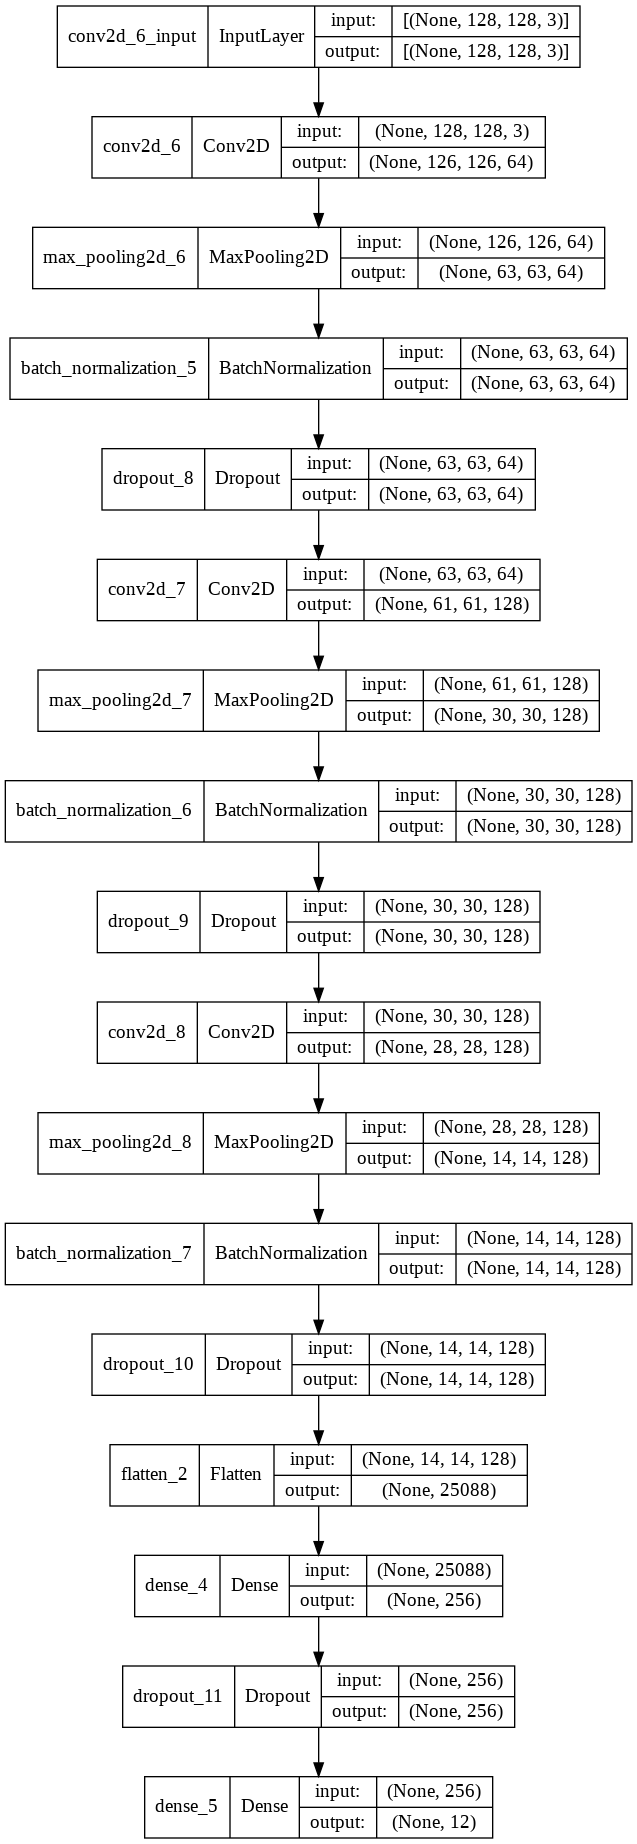

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#lrr = ReduceLROnPlateau(monitor='val_accuracy',  patience=3,   verbose=1,  factor=0.5,  min_lr=0.00001)

#filepath="/content/drive/MyDrive/Colab Notebooks/AAT/model1_weights.hdf5"
#checkpoints = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoints,lrr]

history = model.fit(generator.flow(X_train,y_train,batch_size=64),epochs=100,verbose=2,shuffle=True,validation_data= (X_val,y_val))# callbacks=callbacks_list)
pd.DataFrame(history.history)

Epoch 1/100
52/52 - 258s - loss: 3.6471 - accuracy: 0.3068 - val_loss: 27.0155 - val_accuracy: 0.0604 - 258s/epoch - 5s/step
Epoch 2/100
52/52 - 257s - loss: 2.9726 - accuracy: 0.3380 - val_loss: 42.3357 - val_accuracy: 0.0604 - 257s/epoch - 5s/step
Epoch 3/100
52/52 - 261s - loss: 2.6370 - accuracy: 0.3504 - val_loss: 51.4950 - val_accuracy: 0.0604 - 261s/epoch - 5s/step
Epoch 4/100
52/52 - 258s - loss: 2.2595 - accuracy: 0.3768 - val_loss: 57.6574 - val_accuracy: 0.0604 - 258s/epoch - 5s/step
Epoch 5/100
52/52 - 260s - loss: 2.0009 - accuracy: 0.4186 - val_loss: 55.2513 - val_accuracy: 0.0604 - 260s/epoch - 5s/step
Epoch 6/100
52/52 - 259s - loss: 1.8271 - accuracy: 0.4298 - val_loss: 67.1639 - val_accuracy: 0.0604 - 259s/epoch - 5s/step
Epoch 7/100
52/52 - 258s - loss: 1.6119 - accuracy: 0.4773 - val_loss: 66.2686 - val_accuracy: 0.0604 - 258s/epoch - 5s/step
Epoch 8/100
52/52 - 258s - loss: 1.5946 - accuracy: 0.4740 - val_loss: 73.5443 - val_accuracy: 0.0604 - 258s/epoch - 5s/step


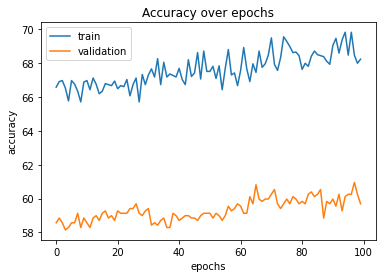

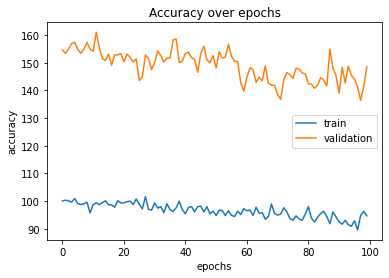

In [ ]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()



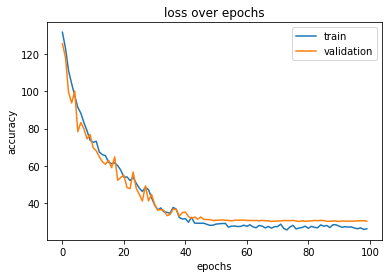

In [ ]:
plt.plot(np.array(history.history['loss']) * 100)
plt.plot(np.array(history.history['val_loss']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('loss over epochs')
plt.show()

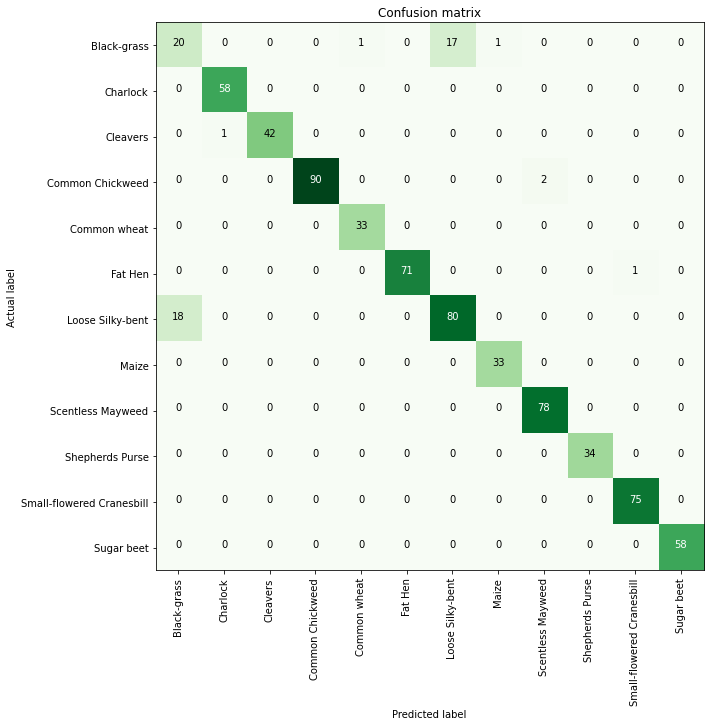

In [ ]:
# Predict the values from the test data
y_pred = model.predict(X_test_new)
y_pred_Classes = np.argmax(y_pred, axis = 1)
trueY = np.argmax(y_test_new, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = labels.classes_)

In [ ]:
score, acc = model.evaluate(X_test_new,y_test_new)
score1, acc1 = model.evaluate(X_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)



104/104 [==============================] - 1s 13ms/step - loss: 1.2608 - accuracy: 0.6334
Test score: 1.1506704092025757    Test accuracy: 0.6535764336585999
Train score: 1.2607966661453247    Train accuracy: 0.6333834528923035


In [ ]:
model.load_weights("/content/temp_train/model1_weights.hdf5")

print(model.evaluate(X_train, y_train))  # Evaluate on train set
print(model.evaluate(X_test, y_test))  # Evaluate on test set

ValueError: ignored

*Model* 1 has 96% on training accuracy and 94 %  on testing accuracy.  




# CNN Model 2

*   4 convolution layers (filters=64/64/128/256, kernel_size=(3, 3) activation='relu')
*   MaxPool2D((2, 2)
*   Dropout(0.25)
*   GlobalMaxPool2D
*   Flatten
*   2 dense layers (256 / 256, activation='relu')
*   Dropout(0.25)
*   loss='categorical_crossentropy', optimizer='adam'
*   model compile with ImageDataGenerator to minimize overfitting.
*   shuffle = True

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(70, 70, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(GlobalMaxPool2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 66, 66, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 33, 33, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                    

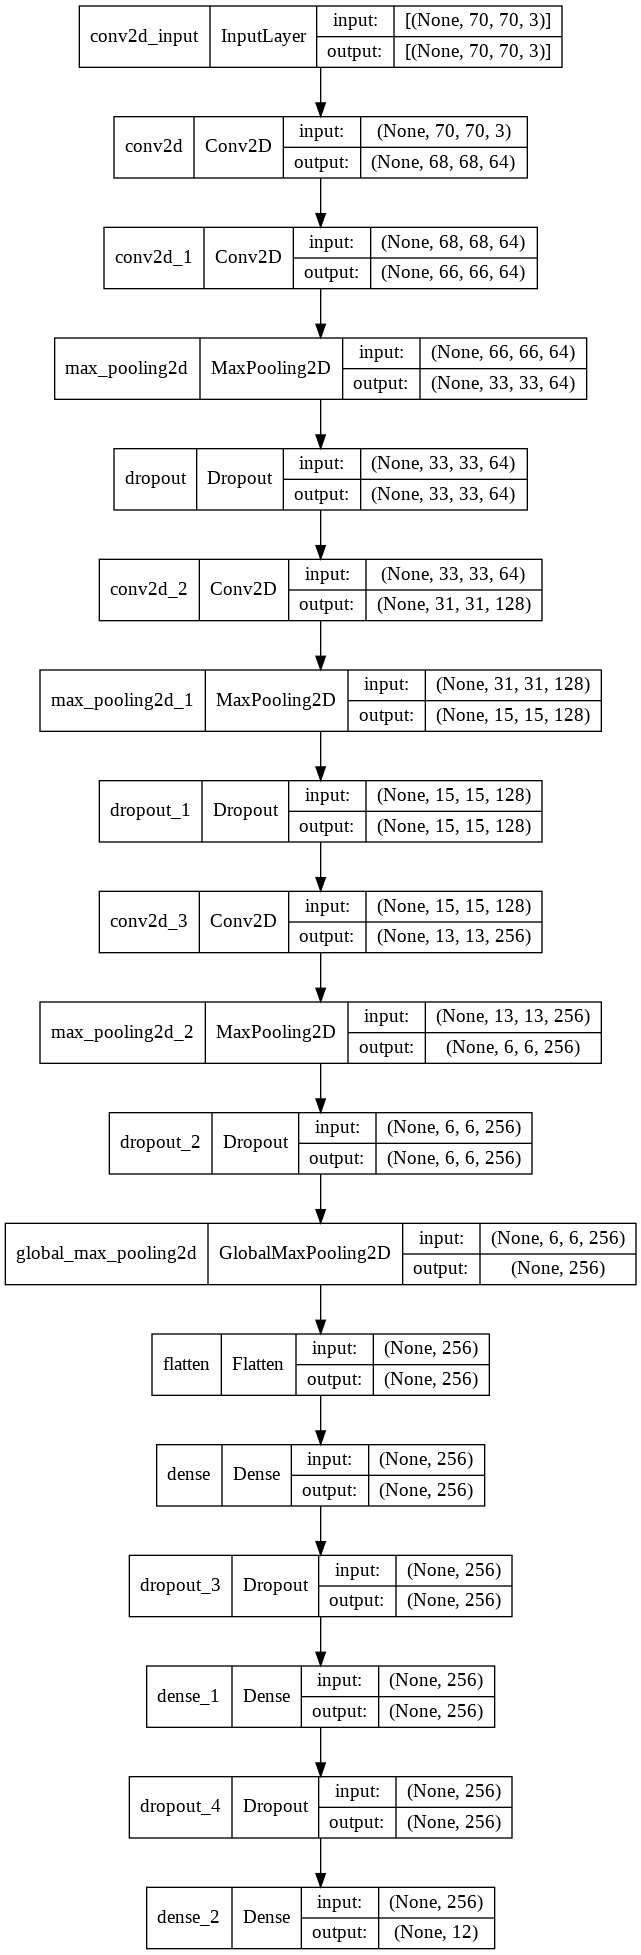

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
lrr = ReduceLROnPlateau(monitor='val_accuracy',  patience=3,   verbose=1,  factor=0.3,  min_lr=0.00001)

filepath="/content/drive/MyDrive/Colab Notebooks/AAT/model2_weights.hdf5"
checkpoints = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoints,lrr]

history = model.fit(generator.flow(X_train,y_train,batch_size=64),epochs=40, verbose=2,shuffle=True,validation_data=(X_val,y_val), callbacks = callbacks_list)
pd.DataFrame(history.history)

Epoch 1/40

Epoch 00001: val_accuracy improved from -inf to 0.85534, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/model2_weights.hdf5
52/52 - 8s - loss: 0.4416 - accuracy: 0.8403 - val_loss: 0.4369 - val_accuracy: 0.8553 - lr: 1.0000e-05 - 8s/epoch - 148ms/step
Epoch 2/40

Epoch 00002: val_accuracy did not improve from 0.85534
52/52 - 7s - loss: 0.4355 - accuracy: 0.8424 - val_loss: 0.4388 - val_accuracy: 0.8553 - lr: 1.0000e-05 - 7s/epoch - 140ms/step
Epoch 3/40

Epoch 00003: val_accuracy did not improve from 0.85534
52/52 - 7s - loss: 0.4444 - accuracy: 0.8424 - val_loss: 0.4379 - val_accuracy: 0.8553 - lr: 1.0000e-05 - 7s/epoch - 138ms/step
Epoch 4/40

Epoch 00004: val_accuracy did not improve from 0.85534
52/52 - 7s - loss: 0.4371 - accuracy: 0.8403 - val_loss: 0.4356 - val_accuracy: 0.8553 - lr: 1.0000e-05 - 7s/epoch - 139ms/step
Epoch 5/40

Epoch 00005: val_accuracy did not improve from 0.85534
52/52 - 7s - loss: 0.4325 - accuracy: 0.8427 - val_loss: 0.4359 - val_ac

,loss,accuracy,val_loss,val_accuracy,lr
0,0.441607,0.840301,0.436938,0.855337,0.00001
1,0.435504,0.842406,0.438841,0.855337,0.00001
2,0.444367,0.842406,0.437926,0.855337,0.00001
3,0.437108,0.840301,0.435633,0.855337,0.00001
4,0.432479,0.842707,0.435937,0.855337,0.00001
5,0.449483,0.843910,0.432584,0.853933,0.00001
6,0.449127,0.840602,0.431726,0.853933,0.00001
7,0.437828,0.843308,0.429372,0.853933,0.00001
8,0.424422,0.843008,0.434137,0.852528,0.00001
9,0.450965,0.840602,0.433576,0.855337,0.00001


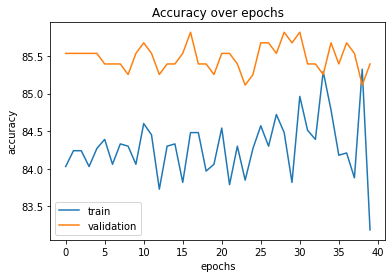

In [ ]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

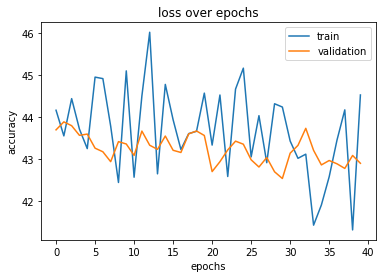

In [ ]:
plt.plot(np.array(history.history['loss']) * 100)
plt.plot(np.array(history.history['val_loss']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('loss over epochs')
plt.show()

In [ ]:
scores = model.evaluate(X_test_new, y_test_new)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 18ms/step - loss: 0.3881 - accuracy: 0.8626
Test loss: 0.38805416226387024
Test accuracy: 0.8625525832176208


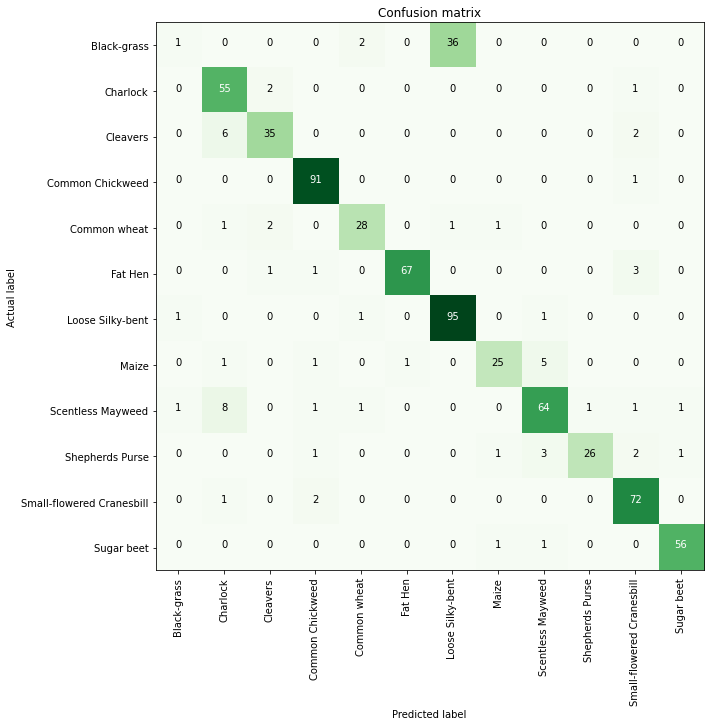

In [ ]:
# Predict the values from the test data
y_pred = model.predict(X_test_new)
y_pred_Classes = np.argmax(y_pred, axis = 1)
trueY = np.argmax(y_test_new, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = labels.classes_)


In [ ]:
#Final score and accuracy of the model

score, acc = model.evaluate(X_test_new,y_test_new)
score1, acc1 = model.evaluate(X_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)



104/104 [==============================] - 2s 24ms/step - loss: 0.3583 - accuracy: 0.8746
Test score: 0.38805416226387024    Test accuracy: 0.8625525832176208
Train score: 0.3582994341850281    Train accuracy: 0.8745864629745483


In [ ]:
model.load_weights("/content/temp_train/model2_weights.hdf5")

print(model.evaluate(X_train, y_train))  # Evaluate on train set
print(model.evaluate(X_test, y_test))  # Evaluate on test set

104/104 [==============================] - 2s 19ms/step - loss: 0.2115 - accuracy: 0.9299
[0.2115216702222824, 0.9299247860908508]
45/45 [==============================] - 1s 26ms/step - loss: 0.2700 - accuracy: 0.9039
[0.26999789476394653, 0.9038596749305725]


Model 2 has 92% on training accuracy and 90% on testing accuracy.



# CNN Model 3

*   6 convolution layers (filters=64/64/128/128/**256**/256, kernel_size=(3, 3) activation='relu')
*   MaxPool2D((2, 2)
*   Dropout(0.25)
*   GlobalMaxPool2D
*   Flatten
*   2 dense layers (256 / 256, activation='relu')
*   Dropout(0.25)
*   loss='categorical_crossentropy', optimizer='adam'
*   model compile with ImageDataGenerator to minimize overfitting.
*   shuffle = True
*callback option and lrr

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(trainImg_new,convertedlabels,test_size=0.1,random_state=7,stratify=convertedlabels)

In [ ]:
generator = ImageDataGenerator(rotation_range = 180,zoom_range = 0.1,width_shift_range = 0.1,height_shift_range = 0.1,horizontal_flip = True,vertical_flip = True)
generator.fit(X_train)

In [ ]:

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(70, 70, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 66, 66, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 66, 66, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 64)        102464    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 31, 31, 64)       256       
 hNormalization)                                                 
                                                      

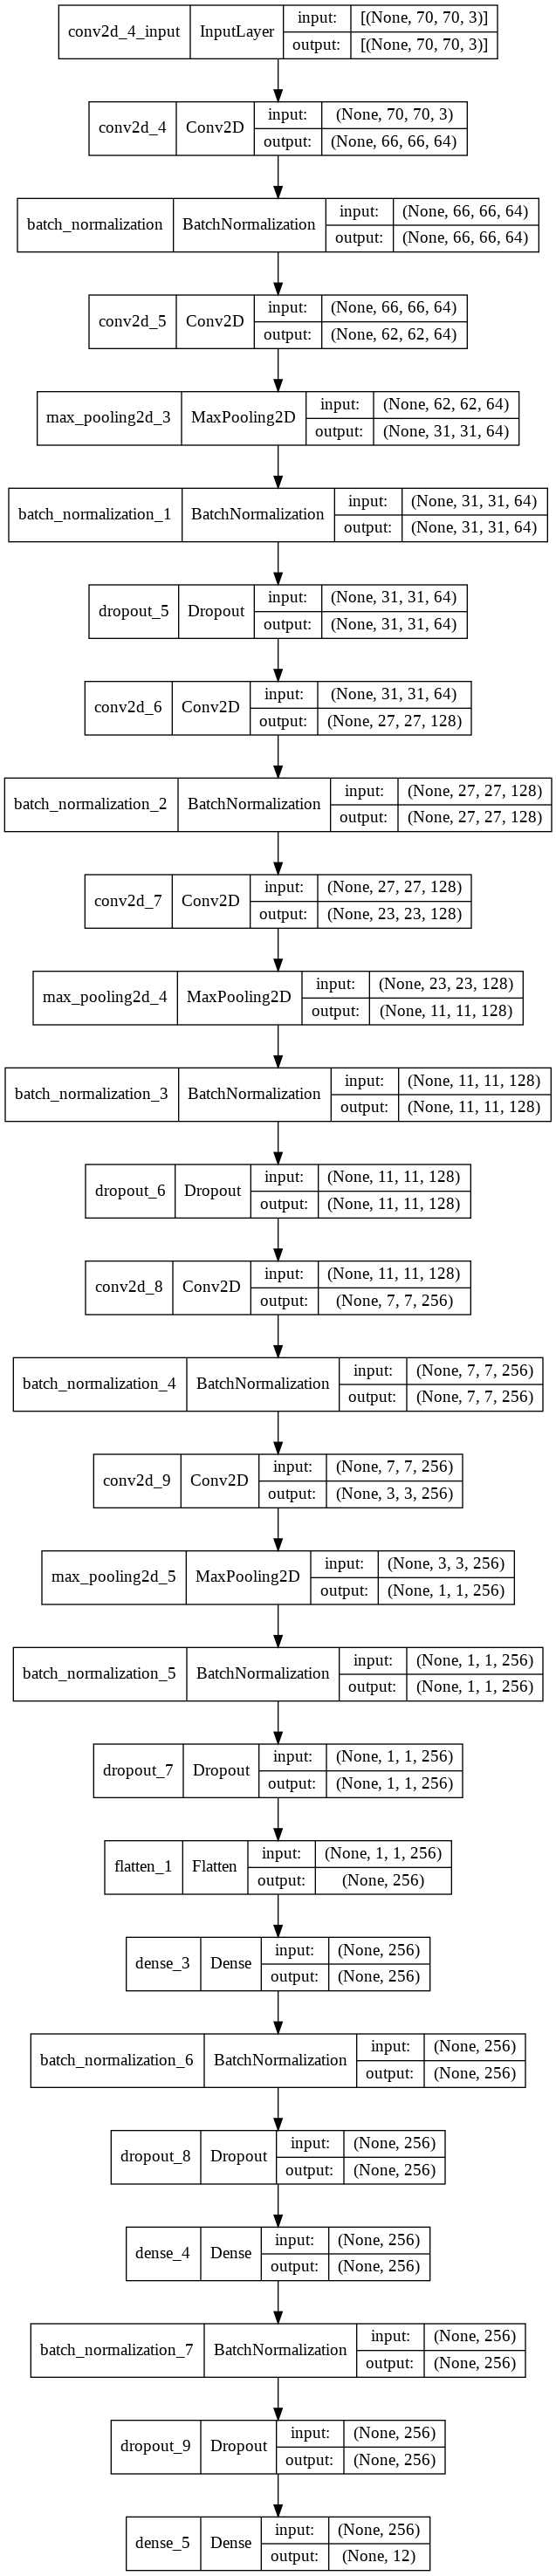

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
lrr = ReduceLROnPlateau(monitor='val_accuracy',  patience=3,   verbose=1,  factor=0.3,  min_lr=0.00001)

filepath="/content/drive/MyDrive/Colab Notebooks/AAT/Fmodel1_weights.hdf5"
checkpoints = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoints,lrr]

history = model.fit(generator.flow(X_train,y_train,batch_size=64),epochs=50, verbose=3,shuffle=True,validation_data=(X_val,y_val),callbacks=callbacks_list)
pd.DataFrame(history.history)

Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.04775, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/Fmodel1_weights.hdf5
Epoch 2/50

Epoch 00002: val_accuracy improved from 0.04775 to 0.06039, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/Fmodel1_weights.hdf5
Epoch 3/50

Epoch 00003: val_accuracy did not improve from 0.06039
Epoch 4/50

Epoch 00004: val_accuracy did not improve from 0.06039
Epoch 5/50

Epoch 00005: val_accuracy improved from 0.06039 to 0.08006, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/Fmodel1_weights.hdf5
Epoch 6/50

Epoch 00006: val_accuracy improved from 0.08006 to 0.10815, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/Fmodel1_weights.hdf5
Epoch 7/50

Epoch 00007: val_accuracy did not improve from 0.10815
Epoch 8/50

Epoch 00008: val_accuracy improved from 0.10815 to 0.18539, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/Fmodel1_weights.hdf5
Epoch 9/50

Epoch 00009: val_accuracy impr

,loss,accuracy,val_loss,val_accuracy,lr
0,2.069816,0.362339,9.599217,0.047753,0.001000
1,1.752261,0.423158,13.866310,0.060393,0.001000
2,1.543570,0.483275,17.814545,0.060393,0.001000
3,1.391800,0.514386,15.908839,0.046348,0.001000
4,1.241323,0.574269,13.500821,0.080056,0.001000
5,1.142928,0.611228,7.629828,0.108146,0.001000
6,1.028494,0.654503,7.215950,0.103933,0.001000
7,0.940493,0.680936,3.781040,0.185393,0.001000
8,0.891804,0.701520,2.102118,0.467697,0.001000
9,0.817958,0.723509,1.005785,0.669944,0.001000


In [ ]:
model.load_weights("/content/drive/MyDrive/Colab Notebooks/AAT/Fmodel1_weights.hdf5")

print(model.evaluate(X_train, y_train))  # Evaluate on train set
print(model.evaluate(X_test, y_test))  # Evaluate on test set

134/134 [==============================] - 5s 38ms/step - loss: 0.1865 - accuracy: 0.9331
[0.1864813268184662, 0.9330993890762329]
15/15 [==============================] - 2s 108ms/step - loss: 0.2470 - accuracy: 0.9200
[0.24699147045612335, 0.9200000166893005]


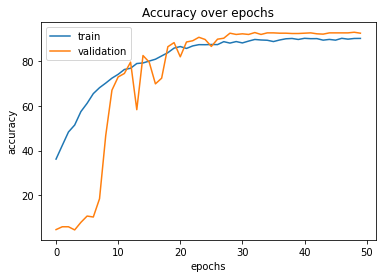

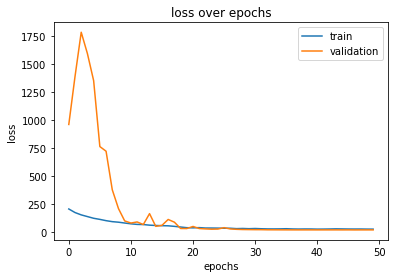

In [ ]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()


plt.plot(np.array(history.history['loss']) * 100)
plt.plot(np.array(history.history['val_loss']) * 100)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('loss over epochs')
plt.show()

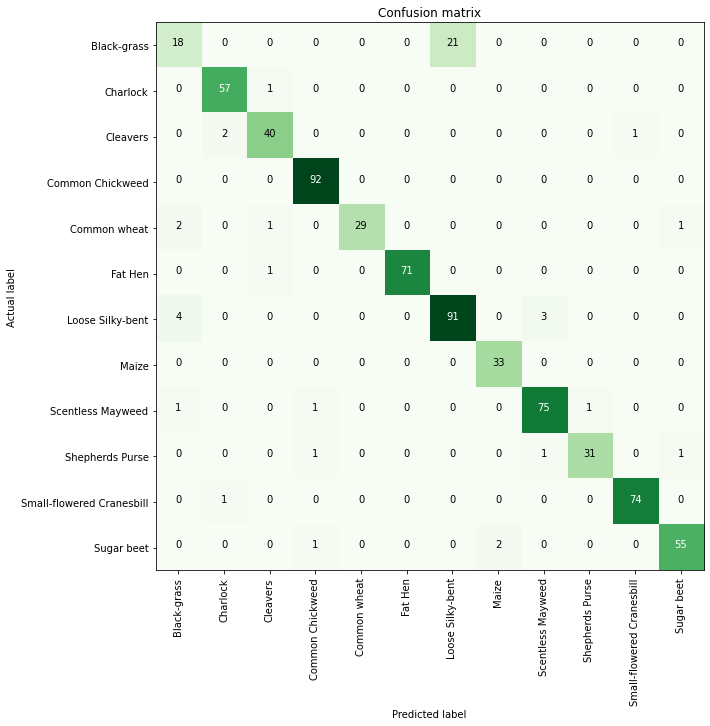

In [ ]:
# Predict the values from the test data
y_pred = model.predict(X_test_new)
y_pred_Classes = np.argmax(y_pred, axis = 1)
trueY = np.argmax(y_test_new, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = labels.classes_)

In [ ]:
score, acc = model.evaluate(X_test_new,y_test_new)
score1, acc1 = model.evaluate(X_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)


134/134 [==============================] - 4s 32ms/step - loss: 0.1865 - accuracy: 0.9331
Test score: 0.18329079449176788    Test accuracy: 0.9340813755989075
Train score: 0.1864813268184662    Train accuracy: 0.9330993890762329


Model 3 train accuracy of  93.3 and test accuracy of 93%

# CNN Model 4 - VGG16
*   Flatten
*   2 dense layers (256, activation='relu')
*   Dropout(0.5)
*   loss='categorical_crossentropy', optimizer='adam'
*   model compile with ImageDataGenerator to minimize overfitting.
*   shuffle = True


In [ ]:
generator = ImageDataGenerator(rotation_range = 180,
                               zoom_range = 0.2,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               horizontal_flip = True,
                               vertical_flip = True)
generator.fit(X_train)

In [ ]:
from keras.applications.vgg16 import VGG16

# initialize the VGG-16 model
# remove the final layer of the model and add 12 classess of plant seedlings
# input images: 128px by 128px.

prior_model = VGG16(weights='imagenet',include_top=False, input_shape=(128,128,3))
model = Sequential()
model.add(prior_model)



58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              8389632   
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_9 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 12)               

In [ ]:
model.layers[0].summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              8389632   
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_9 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 12)               

In [ ]:
for layers in model.layers[0].layers: # looping over each layers in layer 0 to freeze them
  layers.trainable = False

model.layers[0].trainable = False # freezing layer 0 as well for good measure

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
lrr = ReduceLROnPlateau(monitor='val_accuracy',  patience=3,   verbose=1,  factor=0.3,  min_lr=0.00001)

filepath="/content/drive/MyDrive/Colab Notebooks/AAT/VGG19_weights.hdf5"
checkpoints = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoints,lrr]

history = model.fit(generator.flow(X_train,y_train,batch_size=72),epochs=100,verbose=2,shuffle=True,validation_data= (X_val,y_val), callbacks=callbacks_list)
pd.DataFrame(history.history)



Epoch 1/100

Epoch 00001: val_accuracy improved from -inf to 0.13764, saving model to /content/drive/MyDrive/Colab Notebooks/AAT/VGG19_weights.hdf5
47/47 - 20s - loss: 2.4210 - accuracy: 0.1350 - val_loss: 2.4171 - val_accuracy: 0.1376 - lr: 0.0010 - 20s/epoch - 422ms/step
Epoch 2/100

Epoch 00002: val_accuracy did not improve from 0.13764
47/47 - 13s - loss: 2.4210 - accuracy: 0.1320 - val_loss: 2.4172 - val_accuracy: 0.1376 - lr: 0.0010 - 13s/epoch - 281ms/step
Epoch 3/100

Epoch 00003: val_accuracy did not improve from 0.13764
47/47 - 13s - loss: 2.4204 - accuracy: 0.1368 - val_loss: 2.4170 - val_accuracy: 0.1376 - lr: 0.0010 - 13s/epoch - 269ms/step
Epoch 4/100

Epoch 00004: val_accuracy did not improve from 0.13764

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
47/47 - 13s - loss: 2.4192 - accuracy: 0.1332 - val_loss: 2.4168 - val_accuracy: 0.1376 - lr: 0.0010 - 13s/epoch - 269ms/step
Epoch 5/100

Epoch 00005: val_accuracy did not improve from 0.1

KeyboardInterrupt: ignored

In [ ]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

NameError: ignored

In [ ]:
scores = model.evaluate(X_test_new, y_test_new)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 1s 60ms/step - loss: 0.3963 - accuracy: 0.8555
Test loss: 0.3962831199169159
Test accuracy: 0.8555399775505066


In [ ]:
# confusion matrix function

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Greens):

    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

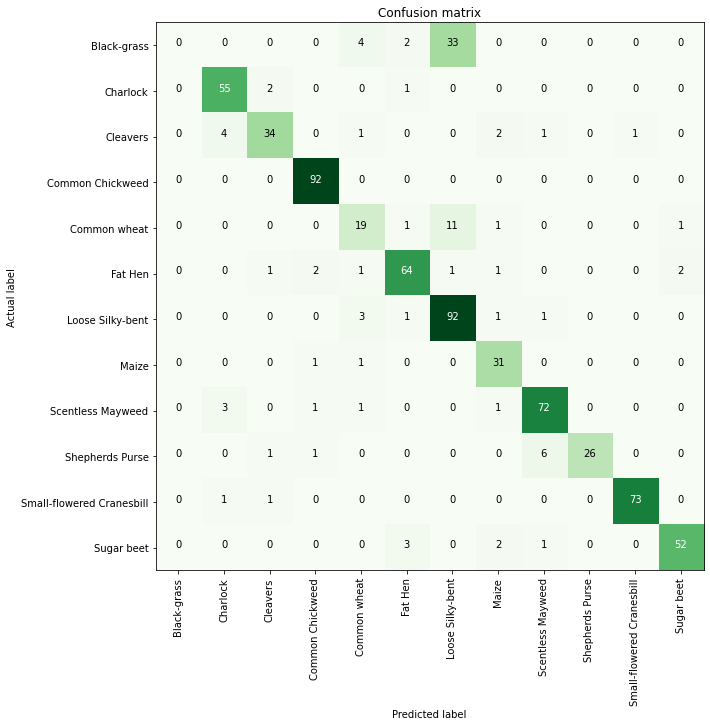

In [ ]:
# Predict the values from the test data
y_pred = model.predict(X_test_new)
y_pred_Classes = np.argmax(y_pred, axis = 1)
trueY = np.argmax(y_test_new, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = labels.classes_)

In [ ]:
#Final score and accuracy of the model

score, acc = model.evaluate(X_test_new,y_test_new)
score1, acc1 = model.evaluate(X_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)

104/104 [==============================] - 5s 48ms/step - loss: 0.2729 - accuracy: 0.8878
Test score: 0.3962831199169159    Test accuracy: 0.8555399775505066
Train score: 0.2728801369667053    Train accuracy: 0.8878195285797119


In [ ]:
test_images_path = "./temp_train/test/*.png"

test_images = glob(test_images_path)
test_images_arr = []
test_files = []

for img in test_images:

    i = cv2.resize(cv2.imread(img), (128, 128))
    test_files.append(img.split('/')[-1])

    # Blurred image
    blurr = cv2.GaussianBlur(i,(5,5),0)

    # HSV image
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)

    #Green Parameters
    sensitivity = 35
    lower  = np.array([60 - sensitivity, 100, 50])
    upper = np.array([60 + sensitivity, 255, 255])

    #Masked image
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)

    #Boolean image
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    test_images_arr.append(new)

test_X = np.asarray(test_images_arr)

# Normalization of the Image Data
test_X = test_X.astype('float32') / 255

In [ ]:
predictions = model.predict(test_X)
preds = np.argmax(predictions, axis=1)
pred_str = labels.classes_[preds]

In [ ]:
final_predictions = {'file':test_files, 'species':pred_str}
final_predictions = pd.DataFrame(final_predictions)
final_predictions.to_csv("./temp_train/submission.csv", index=False)

Model 3 has 88.7% on training accuracy and 85.5% on testing accuracy.

##Transfer learnign CNN modules


# CNN Model 5 - InceptionV3

*   Flatten
*   2 dense layers (1024, activation='relu')
*   Dropout(0.5)
*   loss='categorical_crossentropy', optimizer='adam'
*   model compile with ImageDataGenerator to minimize overfitting.
*   shuffle = True


In [ ]:
from keras.applications.inception_v3 import InceptionV3

# initialize the InceptionV3 model
# remove the final layer of the model and add 12 classess of plant seedlings
# input images: 128px by 128px.

prior_model = InceptionV3(weights='imagenet',include_top=False, input_shape=(128,128,3))

# lets create our model

model = Sequential()

# and here we add a all the InceptionV3 as a layer

model.add(prior_model)


In [ ]:
model.summary()

In [ ]:
model.layers[0].summary()

In [ ]:
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))


model.add(Dense(classes, activation='softmax'))

model.summary()

In [ ]:
for layers in model.layers[0].layers: # looping over each layers in layer 0 to freeze them
  layers.trainable = False

model.layers[0].trainable = False # freezing layer 0 as well for good measure

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(generator.flow(X_train,y_train,batch_size=64),epochs=200, verbose=2,shuffle=True,validation_data=(X_val,y_val))
pd.DataFrame(history.history)

In [ ]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [ ]:
scores = model.evaluate(X_test_new, y_test_new)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
# Predict the values from the test data
y_pred = model.predict(X_test_new)
y_pred_Classes = np.argmax(y_pred, axis = 1)
trueY = np.argmax(y_test_new, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = labels.classes_)

In [ ]:
#Final score and accuracy of the model

score, acc = model.evaluate(X_test_new,y_test_new)
score1, acc1 = model.evaluate(X_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)


# LOADING MODEL
model.load_weights("../input/plantrecomodels/weights.best_17-0.96.hdf5")
dataset = np.load("../input/plantrecomodels/Data.npz")
data = dict(zip(("x_train","x_test","y_train", "y_test"), (dataset[k] for k in dataset)))
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']
print(model.evaluate(x_train, y_train))  # Evaluate on train set
print(model.evaluate(x_test, y_test))  # Evaluate on test set

Model 4 has 90% on training accuracy and 84% on testing accuracy.
